In [360]:
import psycopg2
import pandas as pd

In [361]:
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hypernetx as hnx
from networkx import fruchterman_reingold_layout as layout

### GraphViz is arguably the best graph drawing tool, but it is old and tricky to install.
### Uncommenting the line below will get you slightly better layouts, if you can get it working...

# from networkx.drawing.nx_agraph import graphviz_layout as layout

H = hnx.Hypergraph()

In [362]:
H.add_edge(hnx.Entity('a',{1,2}))
H.add_edge(hnx.Entity('b',{1,2,3}))

Hypergraph({'a': Entity(a,[1, 2],{'weight': 1.0}), 'b': Entity(b,[1, 2, 3],{'weight': 1.0})},name=)

In [363]:
H

Hypergraph({'a': Entity(a,[1, 2],{'weight': 1.0}), 'b': Entity(b,[1, 2, 3],{'weight': 1.0})},name=)

In [364]:
list(H.s_components(edges=True))

[{'a', 'b'}]

In [365]:
rules_text = """t1&t2&IQ(t1.Workclass,t2.Workclass)&IQ(t1.Race,t2.Race)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)&IQ(t1.Country,t2.Country)
t1&t2&EQ(t1.Education,t2.Education)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Race,t2.Race)&IQ(t1.Country,t2.Country)
t1&t2&IQ(t1.Sex,t2.Sex)&EQ(t1.Occupation,t2.Occupation)&IQ(t1.Country,t2.Country)
t1&t2&EQ(t1.Relationship,t2.Relationship)&EQ(t1.Education,t2.Education)&IQ(t1.Maritalstatus,t2.Maritalstatus)
t1&t2&IQ(t1.Income,t2.Income)&IQ(t1.Race,t2.Race)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)&IQ(t1.Country,t2.Country)
t1&t2&IQ(t1.Sex,t2.Sex)&EQ(t1.Education,t2.Education)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Race,t2.Race)
t1&t2&IQ(t1.Sex,t2.Sex)&EQ(t1.Age,t2.Age)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)&IQ(t1.Country,t2.Country)
t1&t2&EQ(t1.Relationship,t2.Relationship)&IQ(t1.Income,t2.Income)&IQ(t1.Race,t2.Race)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)
t1&t2&EQ(t1.Relationship,t2.Relationship)&IQ(t1.Workclass,t2.Workclass)&IQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Race,t2.Race)
t1&t2&IQ(t1.Workclass,t2.Workclass)&EQ(t1.Education,t2.Education)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Country,t2.Country)
t1&t2&IQ(t1.Sex,t2.Sex)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Race,t2.Race)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)
t1&t2&IQ(t1.Sex,t2.Sex)&EQ(t1.Relationship,t2.Relationship)&EQ(t1.Age,t2.Age)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)
t1&t2&IQ(t1.Sex,t2.Sex)&IQ(t1.Income,t2.Income)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Country,t2.Country)
t1&t2&EQ(t1.Age,t2.Age)&IQ(t1.Race,t2.Race)&EQ(t1.Occupation,t2.Occupation)
t1&t2&EQ(t1.Age,t2.Age)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Relationship,t2.Relationship)&IQ(t1.Country,t2.Country)
t1&t2&EQ(t1.Education,t2.Education)&EQ(t1.Age,t2.Age)&EQ(t1.Occupation,t2.Occupation)
t1&t2&IQ(t1.Income,t2.Income)&EQ(t1.Education,t2.Education)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Relationship,t2.Relationship)
t1&t2&IQ(t1.Income,t2.Income)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Relationship,t2.Relationship)&IQ(t1.Race,t2.Race)
t1&t2&EQ(t1.Relationship,t2.Relationship)&EQ(t1.Age,t2.Age)&IQ(t1.Race,t2.Race)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)
t1&t2&IQ(t1.Income,t2.Income)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Race,t2.Race)&IQ(t1.Country,t2.Country)
t1&t2&EQ(t1.Sex,t2.Sex)&IQ(t1.Income,t2.Income)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Relationship,t2.Relationship)
t1&t2&IQ(t1.Income,t2.Income)&IQ(t1.Workclass,t2.Workclass)&EQ(t1.Maritalstatus,t2.Maritalstatus)&EQ(t1.Occupation,t2.Occupation)
t1&t2&IQ(t1.Income,t2.Income)&IQ(t1.Workclass,t2.Workclass)&EQ(t1.Education,t2.Education)&IQ(t1.Race,t2.Race)
t1&t2&EQ(t1.Education,t2.Education)&EQ(t1.Age,t2.Age)&IQ(t1.Race,t2.Race)&IQ(t1.Country,t2.Country)
t1&t2&EQ(t1.Age,t2.Age)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)&EQ(t1.Occupation,t2.Occupation)
t1&t2&IQ(t1.Income,t2.Income)&EQ(t1.Age,t2.Age)&IQ(t1.Race,t2.Race)&IQ(t1.Country,t2.Country)
t1&t2&EQ(t1.Relationship,t2.Relationship)&IQ(t1.Income,t2.Income)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)&IQ(t1.Country,t2.Country)
t1&t2&IQ(t1.Sex,t2.Sex)&IQ(t1.Income,t2.Income)&EQ(t1.Age,t2.Age)&EQ(t1.Occupation,t2.Occupation)
t1&t2&IQ(t1.Sex,t2.Sex)&EQ(t1.Education,t2.Education)&EQ(t1.Occupation,t2.Occupation)
t1&t2&EQ(t1.Age,t2.Age)&IQ(t1.Race,t2.Race)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)&IQ(t1.Country,t2.Country)"""

In [366]:
import re

In [367]:
def prune_and_return(rules):
    rule_graph = hnx.Hypergraph()
    # undirected graph
    rule_dict = {}
    i=0
    for r in rules:
        rule_nodes=list(set(re.findall(r't[12]\.([-\w]+)', r)))
        rule_graph.add_edge(hnx.Entity(i,rule_nodes))
        print(i,rule_nodes)
        i+=1
    hnx.drawing.draw(rule_graph)
    print(rule_graph.diameter())
#     return list(rule_graph.s_components(s=edges=True))

In [368]:
rules=rules_text.split('\n')

0 ['Country', 'HoursPerWeek', 'Race', 'Workclass']
1 ['Country', 'Education', 'Race', 'Maritalstatus']
2 ['Sex', 'Occupation', 'Country']
3 ['Relationship', 'Education', 'Maritalstatus']
4 ['HoursPerWeek', 'Race', 'Income', 'Country']
5 ['Sex', 'Education', 'Race', 'Maritalstatus']
6 ['Sex', 'HoursPerWeek', 'Age', 'Country']
7 ['HoursPerWeek', 'Relationship', 'Income', 'Race']
8 ['Maritalstatus', 'Relationship', 'Race', 'Workclass']
9 ['Country', 'Maritalstatus', 'Education', 'Workclass']
10 ['Sex', 'HoursPerWeek', 'Maritalstatus', 'Race']
11 ['Sex', 'HoursPerWeek', 'Relationship', 'Age']
12 ['Sex', 'Maritalstatus', 'Income', 'Country']
13 ['Occupation', 'Race', 'Age']
14 ['Relationship', 'Maritalstatus', 'Age', 'Country']
15 ['Occupation', 'Education', 'Age']
16 ['Relationship', 'Education', 'Income', 'Maritalstatus']
17 ['Relationship', 'Maritalstatus', 'Income', 'Race']
18 ['HoursPerWeek', 'Relationship', 'Age', 'Race']
19 ['Country', 'Maritalstatus', 'Income', 'Race']
20 ['Sex', 'R

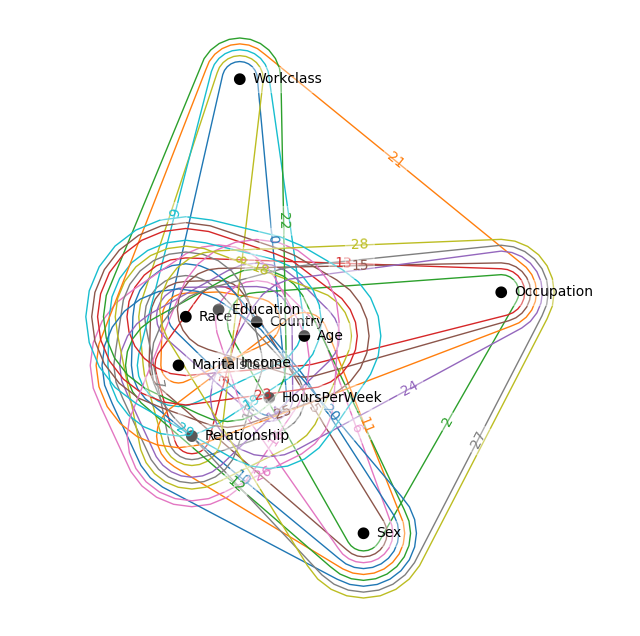

In [369]:
prune_and_return(rules)

In [370]:
# cut off at one step neighbor constraints

In [371]:
def one_step_constraints(rules, complaint_attr):
    rule_graph = hnx.Hypergraph()
    # undirected graph
    rule_dict = {}
    res=[]
    nodes=set([])
    i=0
    for r in rules:
        rule_nodes=set(re.findall(r't[12]\.([-\w]+)', r))
#         print(rule_nodes)
        rule_dict[r]=rule_nodes
    for k,v in rule_dict.items():
        if(complaint_attr in v):
            res.append(k)
            nodes=nodes.union(v)
    return len(res), round(len(res)/len(rules),2), len(nodes)


In [372]:
cols=['age','workclass','education','marital-status',
      'occupation','relationship','race','sex','hours-per-week','native-country','income'
]

cols=['Country', 'HoursPerWeek', 'Race', 'Workclass','Education', 'Maritalstatus', 'Occupation',
     'Relationship', 'Sex', '']


In [373]:
len(cols)

11

In [374]:
len(rules)

30

In [375]:
for c in cols:
    print(f"{c}:{one_step_constraints(rules, c)}")
    print('\n')

age:(0, 0.0, 0)


workclass:(0, 0.0, 0)


education:(0, 0.0, 0)


marital-status:(0, 0.0, 0)


occupation:(0, 0.0, 0)


relationship:(0, 0.0, 0)


race:(0, 0.0, 0)


sex:(0, 0.0, 0)


hours-per-week:(0, 0.0, 0)


native-country:(0, 0.0, 0)


income:(0, 0.0, 0)


